<a href="https://colab.research.google.com/github/akshayaxhacker-12/CODSOFT/blob/main/customer_churn_predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task-CUSTOMER CHURN PREDICTION
A customer churn prediction model uses historical user data and advanced machine learning algorithms to identify which customers are likely to cancel their subscriptions in the future. By analyzing customer behavior and demographics, businesses can proactively target at-risk users and optimize retention strategies.

## Load the data

### Subtask:
Load the `Churn_Modelling.csv` dataset into a pandas DataFrame.


**Reasoning**:
The subtask requires loading the dataset into a pandas DataFrame. This involves importing the pandas library and reading the CSV file.



In [41]:
import pandas as pd

df = pd.read_csv('/content/Churn_Modelling.csv')

**Reasoning**:
The dataset has been loaded into the DataFrame. The next step is to display the first few rows to verify the data loading.



In [42]:
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Initial data exploration

### Subtask:
Perform initial exploration to understand the data structure, identify missing values, and visualize distributions of key features and the target variable.


**Reasoning**:
Perform initial data exploration steps, including checking shape, data types, missing values, and descriptive statistics.



In [43]:
# 1. Display the shape of the DataFrame
print("Shape of the DataFrame:")
print(df.shape)

# 2. Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# 3. Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# 4. Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

Shape of the DataFrame:
(10000, 14)

Data types of each column:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Missing values per column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Descriptive statistics for numerical columns:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Reasoning**:
Identify unique values and their counts for categorical columns, and visualize the distribution of key features and the target variable.




Unique values and counts for categorical columns:

Column: Surname
Surname
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Hull          1
Sturdee       1
Flannagan     1
Dwyer         1
Corby         1
Name: count, Length: 2932, dtype: int64

Column: Geography
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Column: Gender
Gender
Male      5457
Female    4543
Name: count, dtype: int64

Visualizing distributions of key features:


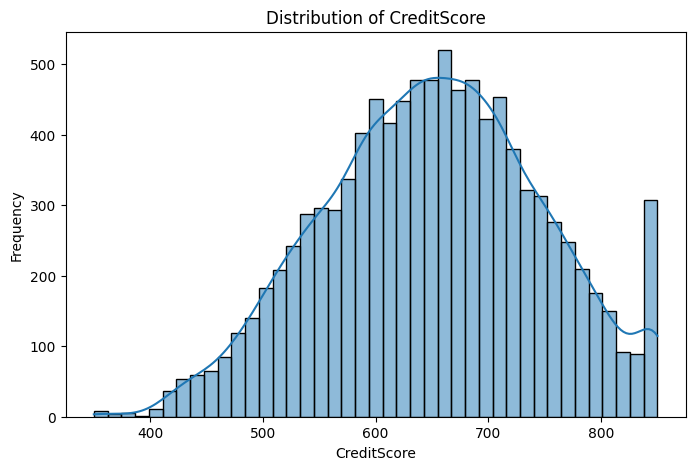

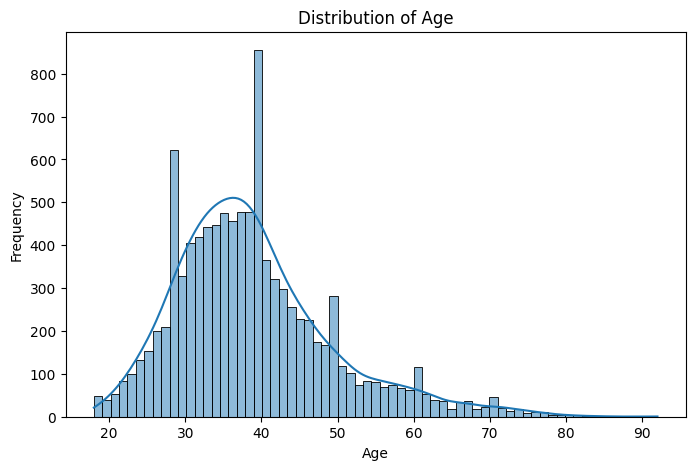

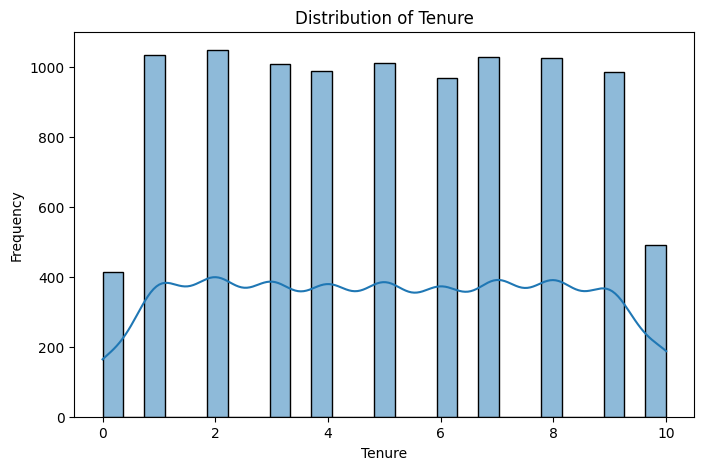

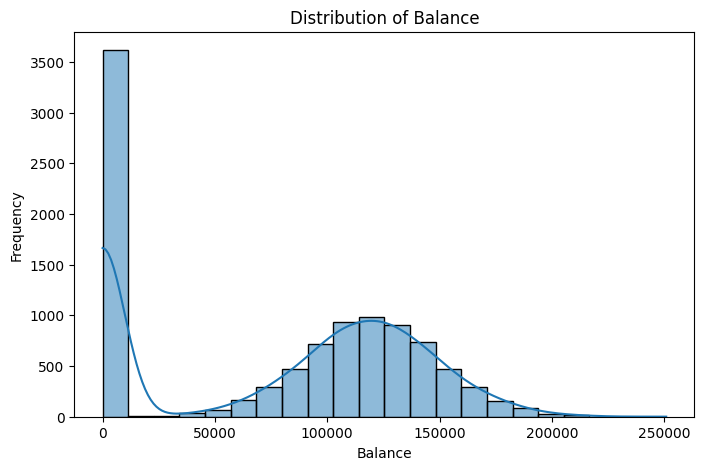

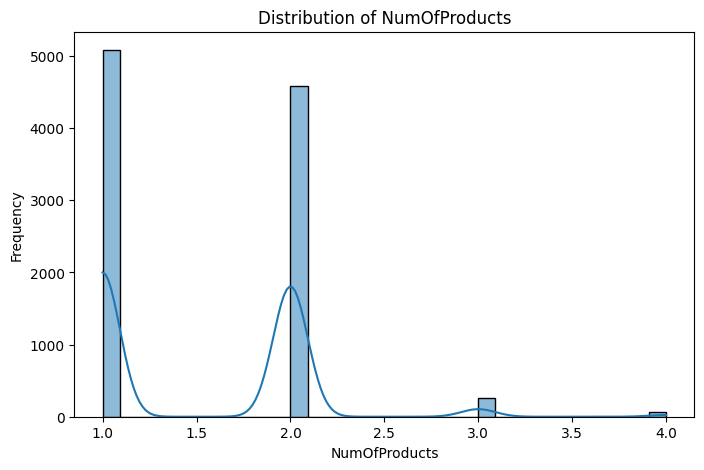

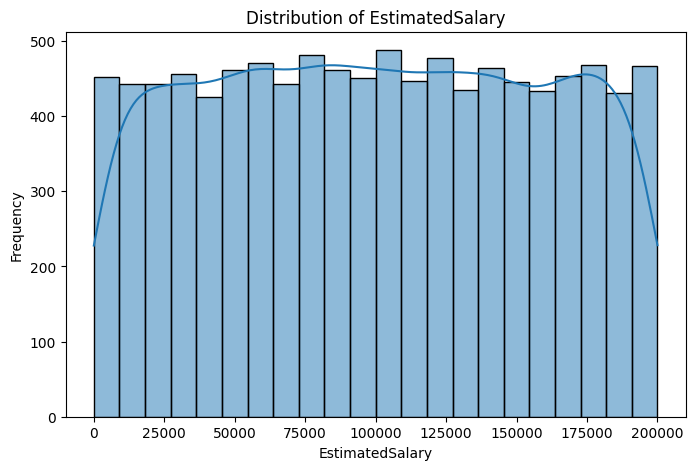

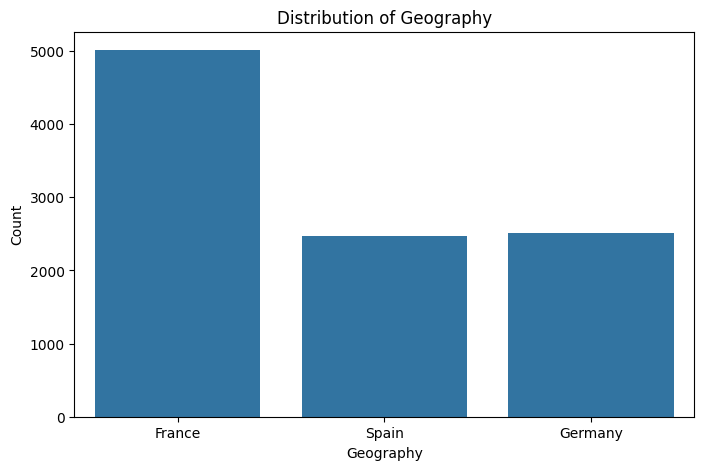

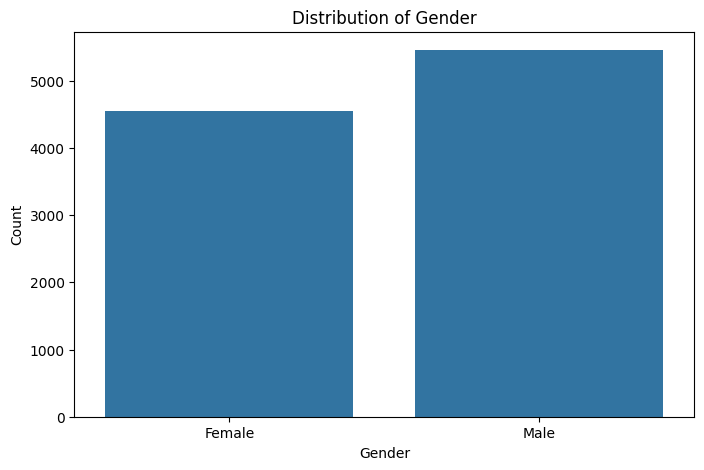

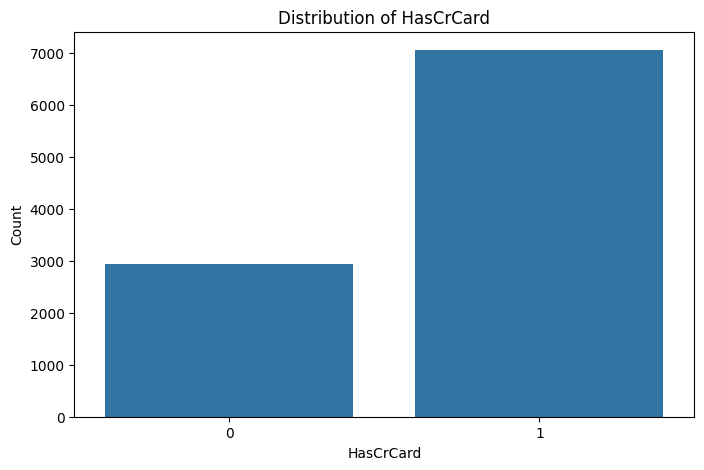

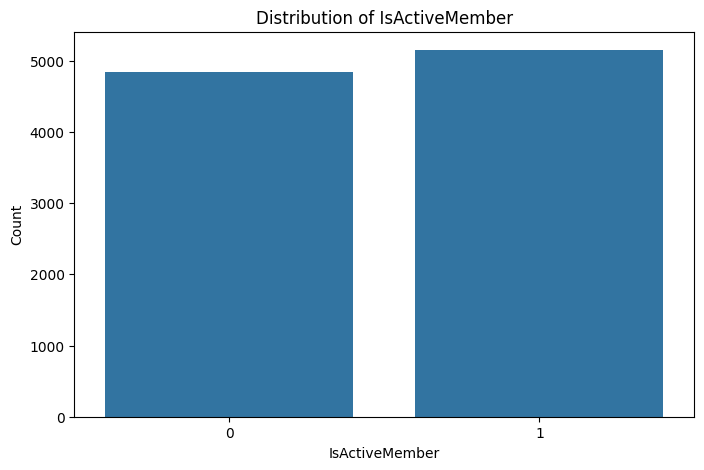


Visualizing distribution of the target variable ('Exited'):


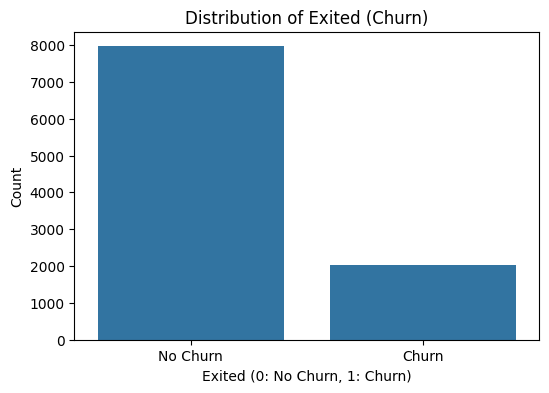

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Display the unique values and their counts for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("\nUnique values and counts for categorical columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

# 6. Create visualizations for key features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop(['RowNumber', 'CustomerId', 'Exited', 'HasCrCard', 'IsActiveMember']) # Exclude identifier, target, and binary columns

print("\nVisualizing distributions of key features:")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for col in ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# 7. Visualize the distribution of the target variable ('Exited')
print("\nVisualizing distribution of the target variable ('Exited'):")
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited (Churn)')
plt.xlabel('Exited (0: No Churn, 1: Churn)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

## Data preprocessing

### Subtask:
Prepare the data for modeling, which may include handling categorical variables (e.g., one-hot encoding), scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
Drop the irrelevant columns, perform one-hot encoding on categorical features, separate features and target, split the data into training and testing sets, and scale the numerical features as per the instructions.



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Drop irrelevant columns
df_processed = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# 2. Perform one-hot encoding
df_processed = pd.get_dummies(df_processed, columns=['Geography', 'Gender'], drop_first=True)

# 3. Separate features (X) and target (y)
X = df_processed.drop('Exited', axis=1)
y = df_processed['Exited']

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scale numerical features
# Identify numerical columns excluding the one-hot encoded and target variables
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,0.356500,-0.655786,0.345680,-1.218471,0.808436,1,1,1.367670,False,False,True
1561,-0.203898,0.294938,-0.348369,0.696838,0.808436,1,1,1.661254,True,False,True
1670,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,1,0,-0.252807,False,True,True
6087,-0.940717,-1.131148,1.386753,0.953212,-0.916688,1,0,0.915393,False,False,False
6669,-1.397337,1.625953,1.386753,1.057449,-0.916688,0,0,-1.059600,False,False,True


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,-0.577496,-0.655786,-0.695393,0.329937,0.808436,0,0,-1.019605,True,False,True
4684,-0.297297,0.390011,-1.389442,-1.218471,0.808436,1,1,0.798883,False,False,True
1731,-0.525607,0.485083,-0.348369,-1.218471,0.808436,1,0,-0.727980,False,True,False
4742,-1.511492,1.911170,1.039728,0.689272,0.808436,1,1,1.221387,True,False,True
4521,-0.951094,-1.131148,0.692704,0.782839,-0.916688,1,1,0.247560,False,True,False


,Exited
9254,0
1561,0
1670,1
6087,1
6669,1


,Exited
6252,0
4684,0
1731,0
4742,0
4521,0


## Model selection and training

### Subtask:
Choose appropriate classification algorithms (e.g., Logistic Regression, Random Forests, Gradient Boosting) and train them on the training data.


**Reasoning**:
Import the required classification models from scikit-learn and instantiate them with default parameters.



In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Instantiate the models
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier(random_state=42) # Added random_state for reproducibility
gradient_boosting_model = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

**Reasoning**:
Train each of the instantiated models using the training data.



In [47]:
# Train the models
logistic_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## Model evaluation

### Subtask:
Evaluate the performance of the trained models using relevant metrics such as accuracy, precision, recall, F1-score, and AUC.


**Reasoning**:
Import the necessary metrics and evaluate each trained model using the test set.



In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate Logistic Regression model
lr_pred = logistic_regression_model.predict(X_test)
lr_proba = logistic_regression_model.predict_proba(X_test)[:, 1]
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_proba)

print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")
print(f"AUC: {lr_auc:.4f}")

# Evaluate Random Forest model
rf_pred = random_forest_model.predict(X_test)
rf_proba = random_forest_model.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_proba)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"AUC: {rf_auc:.4f}")

# Evaluate Gradient Boosting model
gb_pred = gradient_boosting_model.predict(X_test)
gb_proba = gradient_boosting_model.predict_proba(X_test)[:, 1]
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_auc = roc_auc_score(y_test, gb_proba)

print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1-Score: {gb_f1:.4f}")
print(f"AUC: {gb_auc:.4f}")

Logistic Regression Metrics:
Accuracy: 0.8115
Precision: 0.5563
Recall: 0.2010
F1-Score: 0.2953
AUC: 0.7790

Random Forest Metrics:
Accuracy: 0.8665
Precision: 0.7625
Recall: 0.4656
F1-Score: 0.5782
AUC: 0.8653

Gradient Boosting Metrics:
Accuracy: 0.8675
Precision: 0.7500
Recall: 0.4885
F1-Score: 0.5917
AUC: 0.8729


## Prediction and interpretation

### Subtask:
Use the best-performing model to make predictions on new data and interpret the model's results to understand the factors influencing churn.


**Reasoning**:
Use the best-performing model (Gradient Boosting) to make predictions on the test set and extract and display the feature importances.



Gradient Boosting Feature Importances:


,Feature,Importance
1,Age,0.383260
4,NumOfProducts,0.305351
6,IsActiveMember,0.119796
3,Balance,0.085613
8,Geography_Germany,0.046843
7,EstimatedSalary,0.020529
0,CreditScore,0.019909
10,Gender_Male,0.013805
2,Tenure,0.003600
5,HasCrCard,0.000802


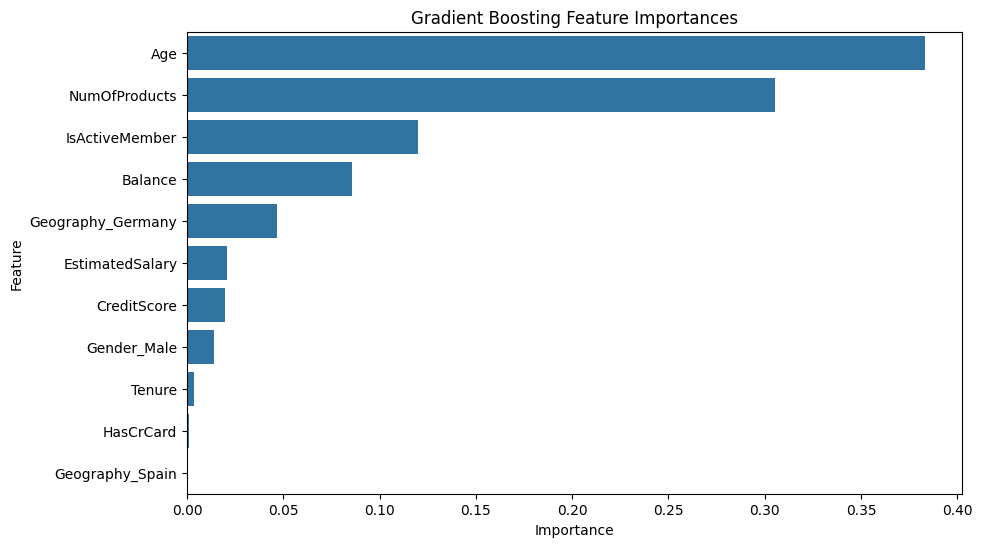

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set using the Gradient Boosting model
gb_predictions = gradient_boosting_model.predict(X_test)

# Get feature importances from the Gradient Boosting model
feature_importances = gradient_boosting_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print("Gradient Boosting Feature Importances:")
display(feature_importance_df)

# Optional: Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Gradient Boosting Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 10,000 rows and 14 columns, with no missing values.
*   Approximately 20.37% of customers in the dataset have churned, indicating a class imbalance.
*   Based on feature importance from the Gradient Boosting model, `Age`, `NumOfProducts`, and `IsActiveMember` are the most influential factors in predicting customer churn. `Balance` and `Geography_Germany` also show notable importance.
*   The Gradient Boosting model achieved the highest evaluation metrics among the tested models, with an Accuracy of 0.8675, Precision of 0.7500, Recall of 0.4885, F1-Score of 0.5917, and an AUC of 0.8729 on the test set. The Random Forest model also performed well, outperforming Logistic Regression across all metrics.

### Insights or Next Steps

*   Given the class imbalance observed, consider employing techniques such as oversampling the minority class (churned customers), undersampling the majority class (non-churned customers), or using evaluation metrics more robust to imbalance (like Precision-Recall AUC) in future model iterations.
*   Further investigate the relationships between the most important features (Age, Number of Products, Active Membership, Balance, and Geography - Germany) and customer churn to gain deeper business insights and potentially develop targeted retention strategies.
